In [189]:
import torch
from torch.nn import functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [1]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt


--2024-04-18 18:37:42--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K   106KB/s    in 2.1s    

2024-04-18 18:37:46 (106 KB/s) - ‘names.txt’ saved [228145/228145]



In [4]:
with open('/Users/hyadav22/Home/DS/names.txt', 'r') as file:
    words = file.read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [5]:
len(words)

32033

In [14]:
# building vocab
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {v:k for k,v in stoi.items()}


In [213]:
# build dataset ffor train, validate, test
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [215]:
Xte, Yte

(tensor([[ 0,  0,  0],
         [ 0,  0, 13],
         [ 0, 13, 21],
         ...,
         [15, 22,  1],
         [22,  1, 14],
         [ 1, 14,  9]]),
 tensor([13, 21, 19,  ..., 14,  9,  0]))

In [104]:
# X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [146]:
C = torch.randn(27,2)
C.shape, C, C[5]

(torch.Size([27, 2]),
 tensor([[ 0.7302,  0.6978],
         [-0.4626, -0.6910],
         [ 0.5591,  2.4372],
         [-0.7123, -0.3307],
         [-0.9095,  0.5123],
         [-0.8230,  1.5360],
         [-0.3133, -1.1720],
         [-0.4046,  0.9182],
         [-0.3048, -0.3482],
         [-0.2112, -0.4758],
         [-1.3498, -0.1131],
         [-0.2842,  1.2574],
         [ 0.0613, -0.0624],
         [ 0.8255,  0.1522],
         [-1.3038,  0.1018],
         [ 1.3786,  1.8476],
         [-0.1644, -1.5072],
         [-1.4931, -0.4713],
         [-0.3975,  0.3550],
         [-0.9953,  1.4343],
         [ 1.3500, -1.7070],
         [ 0.0220,  1.6255],
         [-0.6665, -1.4832],
         [ 0.2218, -1.1028],
         [-1.4638, -1.0262],
         [-0.7704,  0.7824],
         [ 0.2226,  0.2877]]),
 tensor([-0.8230,  1.5360]))

In [147]:
print(F.one_hot(torch.tensor(5), num_classes=27).float())
F.one_hot(torch.tensor(5), num_classes=27).float().shape

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])


torch.Size([27])

In [148]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.8230,  1.5360])

In [149]:
C[Xtr]

tensor([[[ 0.7302,  0.6978],
         [ 0.7302,  0.6978],
         [ 0.7302,  0.6978]],

        [[ 0.7302,  0.6978],
         [ 0.7302,  0.6978],
         [-0.8230,  1.5360]],

        [[ 0.7302,  0.6978],
         [-0.8230,  1.5360],
         [ 0.8255,  0.1522]],

        ...,

        [[ 0.2226,  0.2877],
         [ 0.2226,  0.2877],
         [-0.7704,  0.7824]],

        [[ 0.2226,  0.2877],
         [-0.7704,  0.7824],
         [ 0.2226,  0.2877]],

        [[-0.7704,  0.7824],
         [ 0.2226,  0.2877],
         [-1.4638, -1.0262]]])

In [150]:
C[Xtr].shape

torch.Size([228146, 3, 2])

In [216]:
C[1], Xtr[13,2]

(tensor([-0.3405, -0.4300], grad_fn=<SelectBackward0>), tensor(18))

In [217]:
C[Xtr][13,2]

tensor([0.1403, 0.6135], grad_fn=<SelectBackward0>)

In [218]:
emb = C[Xtr]
emb.shape

torch.Size([182625, 3, 2])

In [154]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)


In [155]:
# emb @ W1 + b1
#  will give error as : mat1 and mat2 shapes cannot be multiplied (48x2 and 6x100)


In [156]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1)
#  not efficient as manually we are passing 3 times emb, if we inc context then it will fail

tensor([[ 0.7302,  0.6978,  0.7302,  0.6978,  0.7302,  0.6978],
        [ 0.7302,  0.6978,  0.7302,  0.6978, -0.8230,  1.5360],
        [ 0.7302,  0.6978, -0.8230,  1.5360,  0.8255,  0.1522],
        ...,
        [ 0.2226,  0.2877,  0.2226,  0.2877, -0.7704,  0.7824],
        [ 0.2226,  0.2877, -0.7704,  0.7824,  0.2226,  0.2877],
        [-0.7704,  0.7824,  0.2226,  0.2877, -1.4638, -1.0262]])

In [157]:

torch.cat( torch.unbind(emb,1),1)



tensor([[ 0.7302,  0.6978,  0.7302,  0.6978,  0.7302,  0.6978],
        [ 0.7302,  0.6978,  0.7302,  0.6978, -0.8230,  1.5360],
        [ 0.7302,  0.6978, -0.8230,  1.5360,  0.8255,  0.1522],
        ...,
        [ 0.2226,  0.2877,  0.2226,  0.2877, -0.7704,  0.7824],
        [ 0.2226,  0.2877, -0.7704,  0.7824,  0.2226,  0.2877],
        [-0.7704,  0.7824,  0.2226,  0.2877, -1.4638, -1.0262]])

In [158]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)


In [159]:
h.shape

torch.Size([228146, 100])

In [160]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

logits = h @ W2 +b2

print(logits.shape)

counts = logits.exp()

prob = counts/counts.sum(1, keepdims=True)

prob.shape, prob

torch.Size([228146, 27])


(torch.Size([228146, 27]),
 tensor([[2.7254e-08, 7.9451e-14, 7.0653e-06,  ..., 9.8577e-01, 1.1982e-12,
          7.0498e-12],
         [3.1926e-06, 1.9334e-09, 5.9751e-09,  ..., 1.9065e-05, 1.8435e-09,
          5.3679e-09],
         [5.8895e-12, 2.4141e-13, 1.7724e-10,  ..., 9.4017e-01, 6.5472e-14,
          2.3805e-10],
         ...,
         [3.0132e-02, 2.3097e-08, 3.9181e-06,  ..., 2.5983e-03, 6.0201e-07,
          6.6150e-05],
         [1.9872e-08, 1.6639e-11, 4.3603e-08,  ..., 1.4734e-01, 5.0616e-10,
          1.4162e-08],
         [3.7546e-11, 6.5464e-14, 6.8993e-07,  ..., 5.2911e-09, 9.7246e-13,
          9.9999e-01]]))

In [163]:
loss = -prob[torch.arange(228146), Y].log().mean()
loss

tensor(18.4360)

In [286]:
# summary

# weights
print(Xtr.shape), print(Ytr.shape)

g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,200))
b1 = torch.randn(200)
W2 = torch.randn((200,27))
b2 = torch.randn(27)
param = [C, W1, b1, W2, b2]

torch.Size([182625, 3])
torch.Size([182625])


In [287]:
sum(p.nelement() for p in param)

11897

In [288]:
for p in param:  
    p.requires_grad = True 

In [289]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [290]:
lri = []
lossi = []
stepi = []

In [302]:


for i in range(50000): 
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # frwrd pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 +b1)
    logits = h @ W2 +b2
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())


    # bckwrd pass
    for p in param:
        p.grad = None
    loss.backward()

    # update weight
    lr = 0.01
    for p in param:
        p.data += -lr * p.grad
        
#     track status
    lossi.append(loss.log10().item()), stepi.append(i)
        
print(loss.item())
        


2.1490354537963867


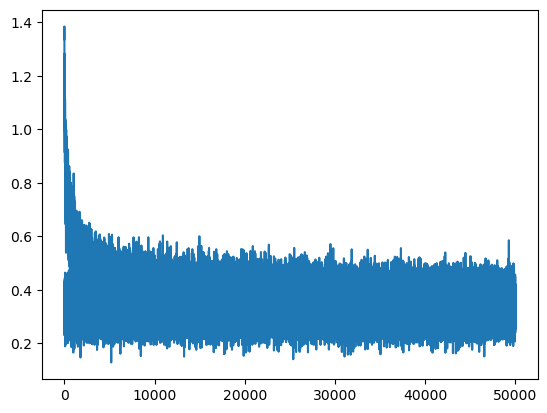

In [303]:
plt.plot(stepi, lossi)

In [304]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 +b1)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.16630220413208


In [305]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 +b1)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.203640937805176


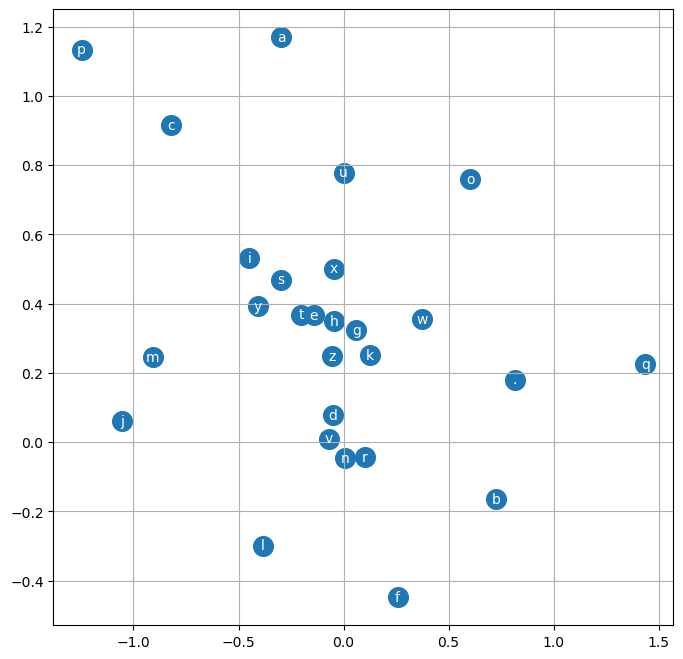

In [297]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [306]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mona.
mayah.
see.
med.
rylle.
emmaniendramir.
zery.
meliighly.
jen.
eden.
eson.
araylyn.
malque.
noshdanrishimies.
kinton.
kyrinnterowi.
brence.
ryyah.
faeh.
yuma.
